# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course. **

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (name it **L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; make sure to use everything you have learned in this course. 


Following is to show how to plot to a file to save a graph:

In [47]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="Sightings_City_CA_2.png")

# your plot here..
ggplot(head(most_city_ca, 10), aes(reorder(city, -count), count, fill=city)) +
geom_bar(stat = "identity") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle('UFO Sightings by City / California') +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))
# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [2]:
library(ggplot2)
library(sp)
library(maps)
library(maptools)
library(mapproj)
library(mapdata)
library(dplyr)
library(RColorBrewer)
library(repr)
library(ggmap)
library(ggthemes)
library(viridis)

Checking rgeos availability: TRUE

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
# Read your data here; 
UFO = read.csv("/dsa/home/craddocka/sp18dsa8650_craddocka/modules/module8/exercises/ufo_data.csv",header=TRUE,sep=",",stringsAsFactors=F)
head(UFO)
# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
# <- ALL YOUR CODE HERE ->

datetime         city                 state country shape   
1 10/10/1949 20:30 san marcos           tx    us      cylinder
2 10/10/1949 21:00 lackland afb         tx            light   
3 10/10/1955 17:00 chester (uk/england)       gb      circle  
4 10/10/1956 21:00 edna                 tx    us      circle  
5 10/10/1960 20:00 kaneohe              hi    us      light   
6 10/10/1961 19:00 bristol              tn    us      sphere  
  duration..seconds. duration..hours.min.
1 2700               45 minutes          
2 7200               1-2 hrs             
3 20                 20 seconds          
4 20                 1/2 hour            
5 900                15 minutes          
6 300                5 minutes           
  comments                                                                                                                                                  
1 This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit                   
2 1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.                                                           
3 Green/Orange circular disc over Chester&#44 England                                                                                                       
4 My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home                
5 AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan
6 My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi                
  date.posted latitude   longitude  
1 4/27/2004   29.8830556  -97.941111
2 12/16/2005  29.38421    -98.581082
3 1/21/2008   53.2         -2.916667
4 1/17/2004   28.9783333  -96.645833
5 1/22/2004   21.4180556 -157.803611
6 4/27/2007   36.5950000  -82.188889

In [4]:
str(UFO)

'data.frame':	80332 obs. of  11 variables:
 $ datetime            : chr  "10/10/1949 20:30" "10/10/1949 21:00" "10/10/1955 17:00" "10/10/1956 21:00" ...
 $ city                : chr  "san marcos" "lackland afb" "chester (uk/england)" "edna" ...
 $ state               : chr  "tx" "tx" "" "tx" ...
 $ country             : chr  "us" "" "gb" "us" ...
 $ shape               : chr  "cylinder" "light" "circle" "circle" ...
 $ duration..seconds.  : chr  "2700" "7200" "20" "20" ...
 $ duration..hours.min.: chr  "45 minutes" "1-2 hrs" "20 seconds" "1/2 hour" ...
 $ comments            : chr  "This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church"| __truncated__ "1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime." "Green/Orange circular disc over Chester&#44 England" "My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I "| __truncated__ .

In [5]:
UFO$latitude<-as.numeric(UFO$latitude)
UFO$year<-sapply(UFO$datetime, function(x) as.numeric(strsplit(strsplit(x," ")[[1]][1],"/")[[1]][3]))
UFO$month<-sapply(UFO$datetime, function(x) as.numeric(strsplit(strsplit(x," ")[[1]][1],"/")[[1]][1]))
UFO$day<-sapply(UFO$datetime, function(x) as.numeric(strsplit(strsplit(x," ")[[1]][1],"/")[[1]][2]))
UFO$hour<-sapply(UFO$datetime, function(x) as.numeric(strsplit(strsplit(x," ")[[1]][2],":")[[1]][1]))
UFO$hour<-ifelse(UFO$hour==24,0,UFO$hour)
UFO$min<-sapply(UFO$datetime, function(x) as.numeric(strsplit(strsplit(x," ")[[1]][2],":")[[1]][2]))
UFO$month_name<-sapply(UFO$month, function(x) month.name[x])
UFO$month_name_ordered<-factor(UFO$month_name, levels =c(month.name))
UFO$DATE<-sapply(UFO$datetime, function(x) strsplit(x,' ')[[1]][1])
UFO$DATE_2<-as.Date(UFO$DATE,"%m/%d/%Y")
UFO$weekday <- factor(weekdays(UFO$DATE_2, T), levels = rev(c("Mon", "Tue", "Wed", "Thu","Fri", "Sat", "Sun")))
UFO$length_min<-as.numeric(UFO$duration..seconds.)/60

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [6]:
head(UFO,3)

datetime         city                 state country shape   
1 10/10/1949 20:30 san marcos           tx    us      cylinder
2 10/10/1949 21:00 lackland afb         tx            light   
3 10/10/1955 17:00 chester (uk/england)       gb      circle  
  duration..seconds. duration..hours.min.
1 2700               45 minutes          
2 7200               1-2 hrs             
3 20                 20 seconds          
  comments                                                                                                                               
1 This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
2 1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.                                        
3 Green/Orange circular disc over Chester&#44 England                                                                                    
  date.posted latitude <U+22EF>   month day hour min month_name
1 4/27/2004   29.88306 <U+22EF> 10    10  20   30  October   
2 12/16/2005  29.38421 <U+22EF> 10    10  21    0  October   
3 1/21/2008   53.20000 <U+22EF> 10    10  17    0  October   
  month_name_ordered DATE       DATE_2     weekday length_min 
1 October            10/10/1949 1949-10-10 Mon      45.0000000
2 October            10/10/1949 1949-10-10 Mon     120.0000000
3 October            10/10/1955 1955-10-10 Mon       0.3333333

In [7]:
str(UFO)

'data.frame':	80332 obs. of  22 variables:
 $ datetime            : chr  "10/10/1949 20:30" "10/10/1949 21:00" "10/10/1955 17:00" "10/10/1956 21:00" ...
 $ city                : chr  "san marcos" "lackland afb" "chester (uk/england)" "edna" ...
 $ state               : chr  "tx" "tx" "" "tx" ...
 $ country             : chr  "us" "" "gb" "us" ...
 $ shape               : chr  "cylinder" "light" "circle" "circle" ...
 $ duration..seconds.  : chr  "2700" "7200" "20" "20" ...
 $ duration..hours.min.: chr  "45 minutes" "1-2 hrs" "20 seconds" "1/2 hour" ...
 $ comments            : chr  "This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church"| __truncated__ "1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime." "Green/Orange circular disc over Chester&#44 England" "My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I "| __truncated__ .

In [8]:
names(UFO)

[1] "datetime"             "city"                 "state"               
 [4] "country"              "shape"                "duration..seconds."  
 [7] "duration..hours.min." "comments"             "date.posted"         
[10] "latitude"             "longitude"            "year"                
[13] "month"                "day"                  "hour"                
[16] "min"                  "month_name"           "month_name_ordered"  
[19] "DATE"                 "DATE_2"               "weekday"             
[22] "length_min"

In [9]:
UFO2 = subset(UFO, select = -c(datetime,duration..seconds.,duration..hours.min.,date.posted))

In [10]:
head(UFO2,3)

city                 state country shape   
1 san marcos           tx    us      cylinder
2 lackland afb         tx            light   
3 chester (uk/england)       gb      circle  
  comments                                                                                                                               
1 This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
2 1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.                                        
3 Green/Orange circular disc over Chester&#44 England                                                                                    
  latitude longitude  year month day hour min month_name month_name_ordered
1 29.88306 -97.941111 1949 10    10  20   30  October    October           
2 29.38421 -98.581082 1949 10    10  21    0  October    October           
3 53.20000  -2.916667 1955 10    10  17    0  October    October           
  DATE       DATE_2     weekday length_min 
1 10/10/1949 1949-10-10 Mon      45.0000000
2 10/10/1949 1949-10-10 Mon     120.0000000
3 10/10/1955 1955-10-10 Mon       0.3333333

In [11]:
dim(UFO2)

[1] 80332    18

In [12]:
apply(is.na(UFO2), 2, any)

city              state            country              shape 
             FALSE              FALSE              FALSE              FALSE 
          comments           latitude          longitude               year 
             FALSE               TRUE              FALSE              FALSE 
             month                day               hour                min 
             FALSE              FALSE              FALSE              FALSE 
        month_name month_name_ordered               DATE             DATE_2 
             FALSE              FALSE              FALSE              FALSE 
           weekday         length_min 
             FALSE               TRUE

In [13]:
UFO3 <- na.omit(UFO2)

In [14]:
apply(is.na(UFO3), 2, any)

city              state            country              shape 
             FALSE              FALSE              FALSE              FALSE 
          comments           latitude          longitude               year 
             FALSE              FALSE              FALSE              FALSE 
             month                day               hour                min 
             FALSE              FALSE              FALSE              FALSE 
        month_name month_name_ordered               DATE             DATE_2 
             FALSE              FALSE              FALSE              FALSE 
           weekday         length_min 
             FALSE              FALSE

In [15]:
dim(UFO3)

[1] 80328    18

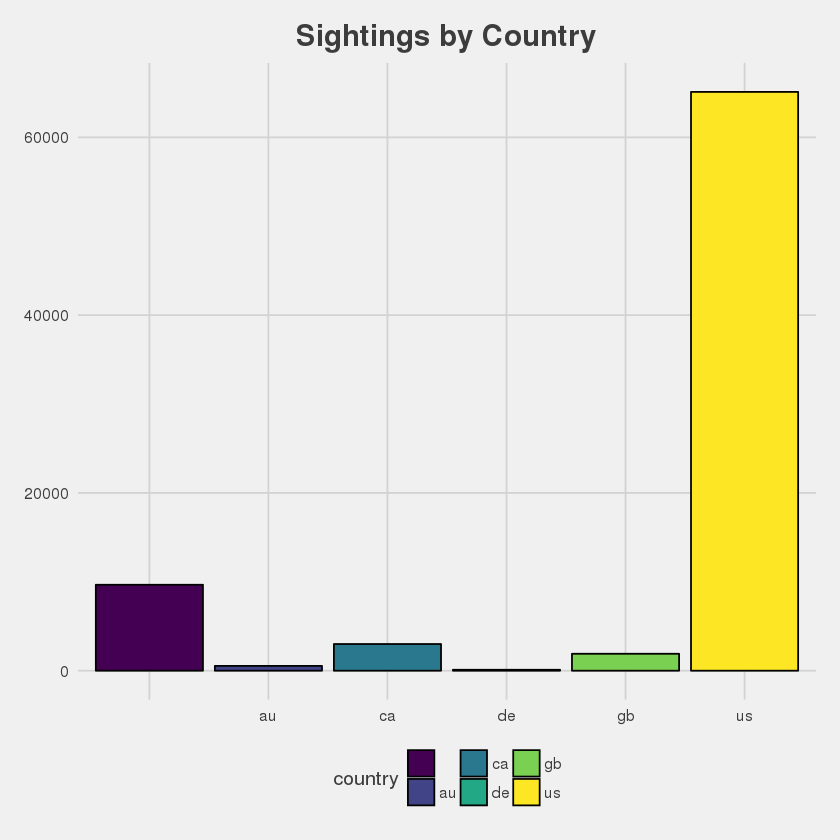

In [16]:
ggplot(UFO3, aes(x=country, fill=country)) + 
geom_bar(colour="black") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Sightings by Country") +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Country", y="Count") 

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

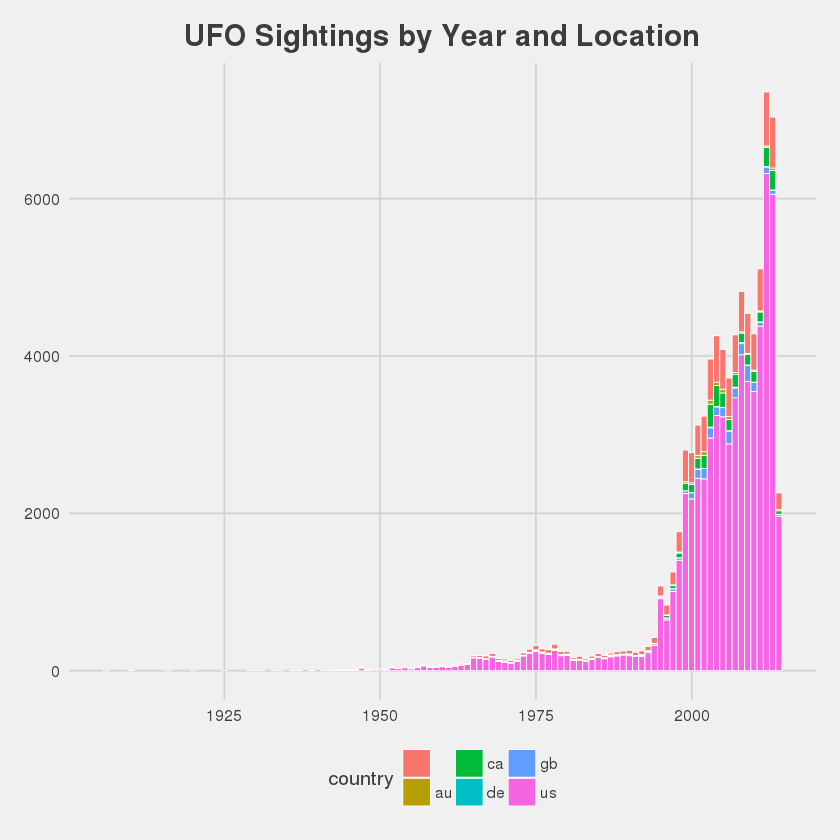

In [17]:
UFO %>%
group_by(year,country) %>% 
summarize(count=n()) %>%
ggplot(aes(x=year,y=count,fill=country)) + 
geom_histogram(stat='identity',width=1,color='white',size=.25) + 
scale_color_brewer(name="",palette='Paired') + 
theme_fivethirtyeight() + 
ggtitle('UFO Sightings by Year and Location') +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Country", y="Count")

In [18]:
UFO3 %>%
group_by(country) %>%
summarize(count=n()) %>%
arrange(-count)

country count
1 us      65112
2          9668
3 ca       3000
4 gb       1905
5 au        538
6 de        105

Warning message:
"Ignoring unknown aesthetics: x, y"

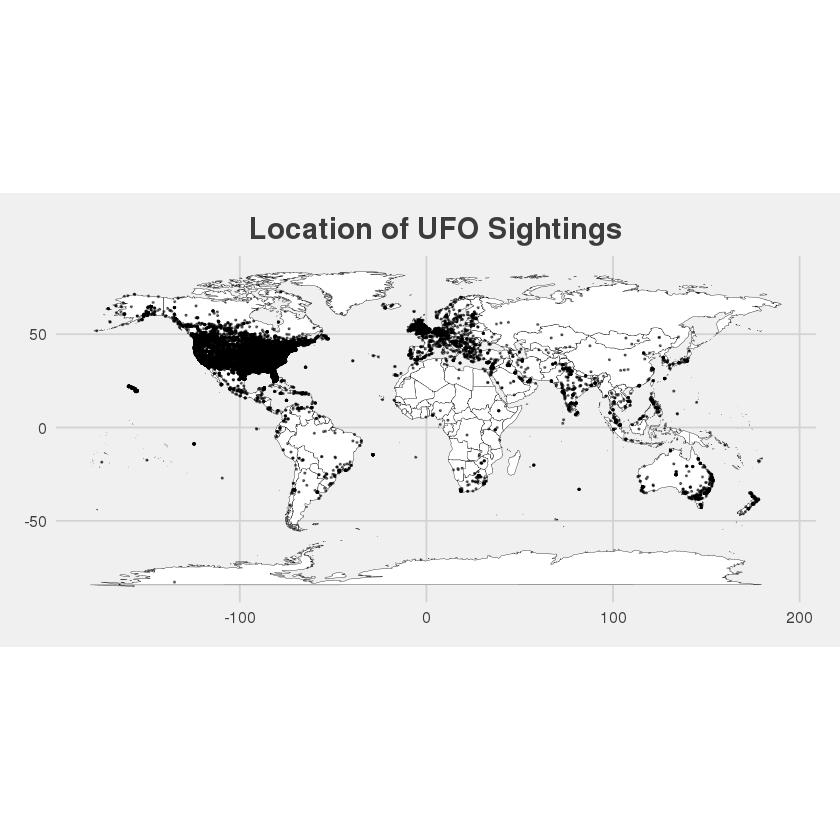

In [19]:
world <- map_data("world")
w <- ggplot()
w <- w + geom_map(data=world, map=world, aes(long, lat, map_id=region), color="black", fill="white", size=0.1)
w <- w + coord_equal() 
w <- w + theme_fivethirtyeight()

w + geom_point(data=UFO3,aes(x=longitude,y=latitude),alpha=.5,size=.25) + 
ggtitle('Location of UFO Sightings') +
theme(plot.title = element_text(hjust = 0.5))

Warning message:
"Ignoring unknown aesthetics: x, y"

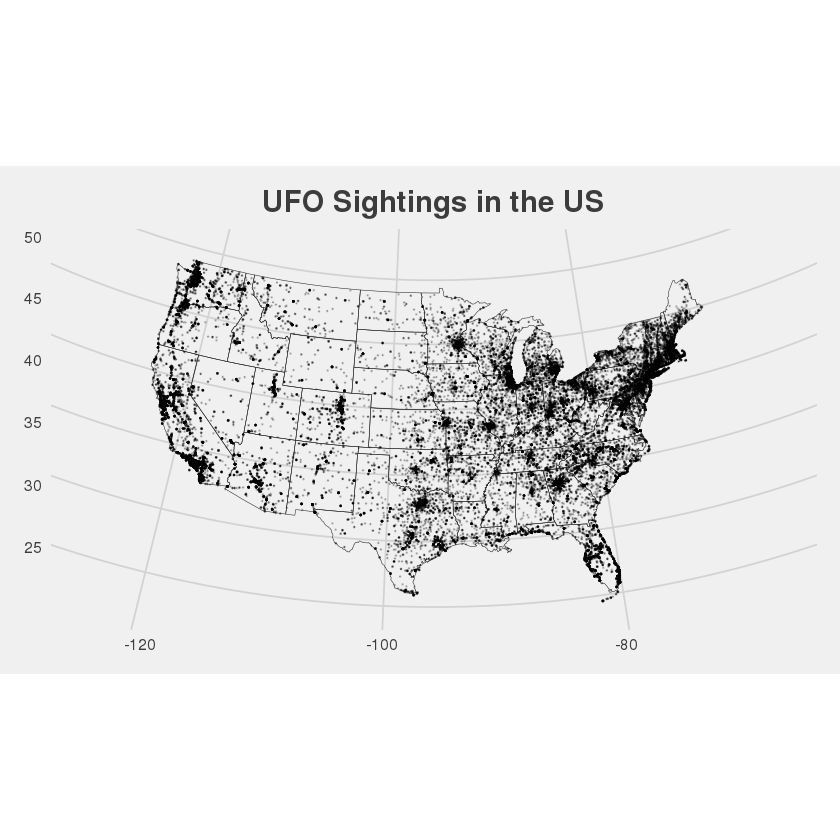

In [20]:
us <- map_data("state")

gg <- ggplot() + geom_map(data=us, map=us, aes(long, lat, map_id=region), color="#222222", fill=NA, size=0.15)
gg <- gg + coord_map("albers", lat0=30, lat1=40)
gg <- gg + theme_fivethirtyeight() 
gg +
geom_point(data=subset(UFO3,country=='us'& state!='hi' & state!='ak' & state!='pr'),aes(x=longitude,y=latitude),alpha=.2,size=.1) +
ggtitle('UFO Sightings in the US') +
theme(plot.title = element_text(hjust = 0.5))

In [21]:
UFO3 %>%
group_by(state) %>%
summarize(count=n()) %>%
arrange(-count) %>%
head(5)

state count
1 ca    9654 
2       5796 
3 wa    4268 
4 fl    4200 
5 tx    3677

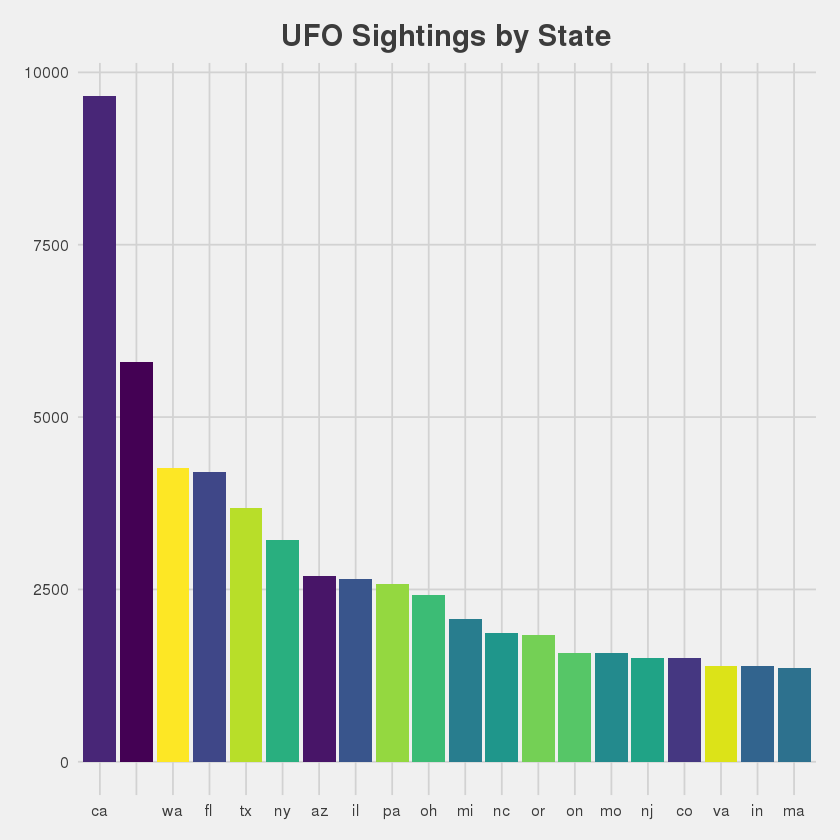

In [22]:
most_state <- UFO3 %>%
    group_by(state) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

ggplot(head(most_state, 20), aes(reorder(state, -count), count, fill=state)) +
geom_bar(stat = "identity") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle('UFO Sightings by State') +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none")

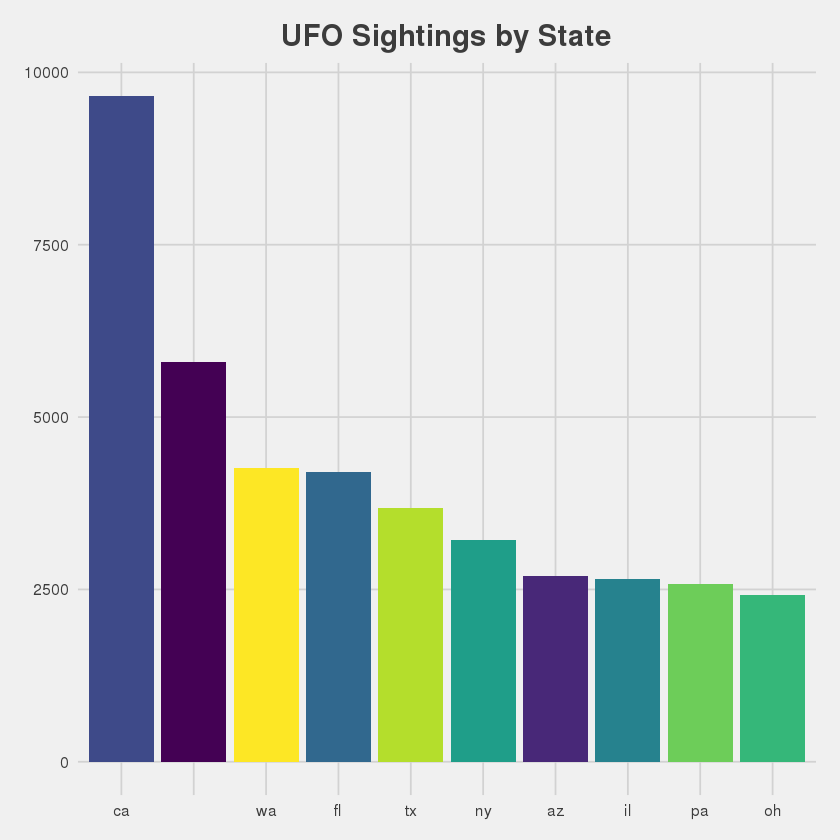

In [44]:
ggplot(head(most_state, 10), aes(reorder(state, -count), count, fill=state)) +
geom_bar(stat = "identity") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle('UFO Sightings by State') +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none")

In [23]:
ca_coord <- subset(UFO3, state=='ca' & country=='us')

In [24]:
head(ca_coord,3)

city      state country shape 
11 hawthorne ca    us      circle
31 san diego ca    us      oval  
46 calabasas ca    us      disk  
   comments                                                                                       
11 ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY WAS POLISHED METAL OF SOME KIND AROUND THE EDGES .
31 My 2nd UFO sighting&#44 October 1979                                                           
46 Unidentified object on Mulholland Highway.                                                     
   latitude longitude year month day hour min month_name month_name_ordered
11 33.91639 -118.3517 1968 10    10  13   0   October    October           
31 32.71528 -117.1564 1979 10    10  22   0   October    October           
46 34.15778 -118.6375 1989 10    10   0   0   October    October           
   DATE       DATE_2     weekday length_min
11 10/10/1968 1968-10-10 Thu     5         
31 10/10/1979 1979-10-10 Wed     3         
46 10/10/1989 1989-10-10 Tue     5

<ScaleContinuousPosition>
 Range:  
 Limits: -125 --  100

<ScaleContinuousPosition>
 Range:  
 Limits:   25 --   50

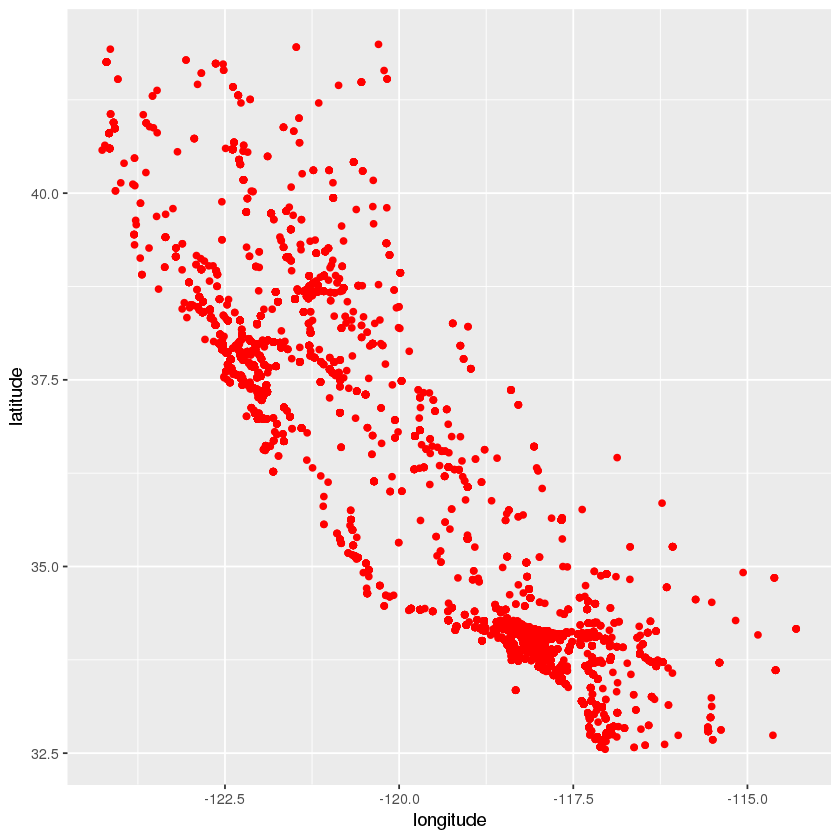

In [25]:
ggplot() +
geom_point(data=ca_coord, aes(x=longitude, y=latitude), color='red')
xlim(-125,100)
ylim(25,50)

Warning message:
"Ignoring unknown aesthetics: x, y"

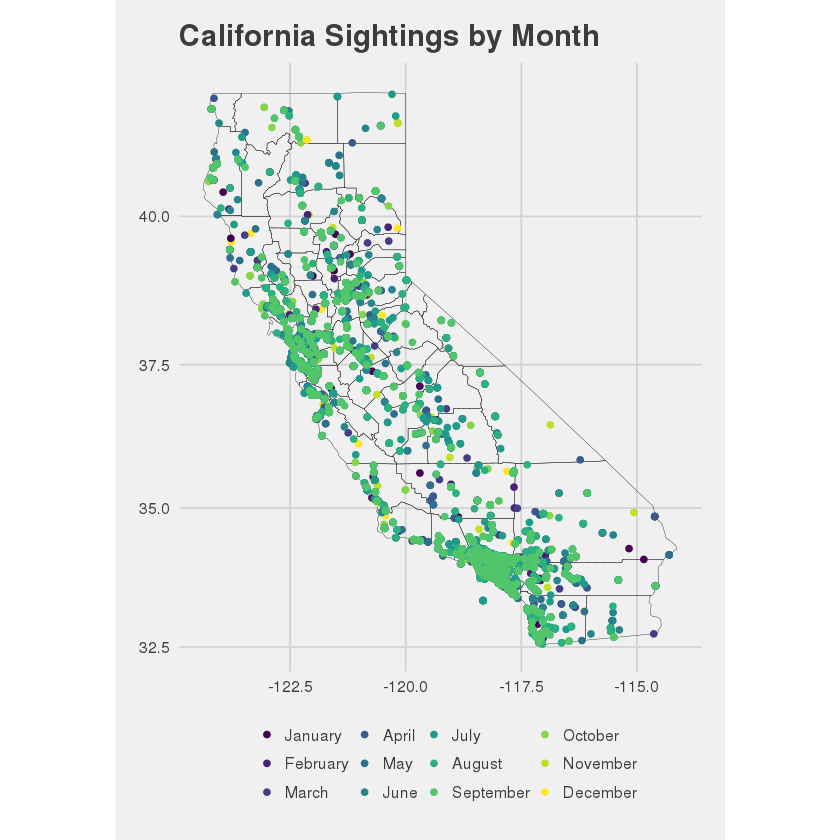

In [26]:
ca <- map_data("county", "california")

hh <- ggplot()
hh <- hh + geom_map(data=ca, map=ca,aes(x=long, y=lat, map_id=region),color="black", fill=NA, size=0.1)
hh <- hh + coord_map()
hh <- hh + theme_fivethirtyeight()

hh + geom_point(data=ca_coord, aes(x=longitude, y=latitude, color=(month_name_ordered))) +
scale_color_viridis(discrete=TRUE) +
theme(legend.title=element_blank()) +
ggtitle("California Sightings by Month")

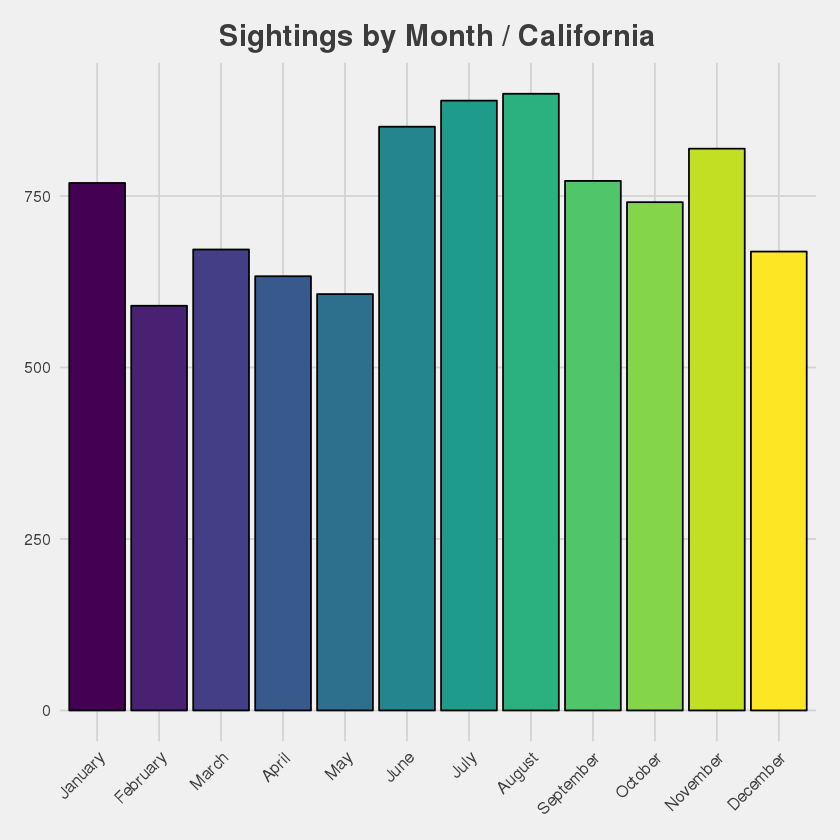

In [27]:
ggplot(ca_coord, aes(x=month_name_ordered, fill=month_name_ordered)) + 
geom_bar(colour="black") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Sightings by Month / California") +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Month", y="Count") +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"Removed 69180 rows containing missing values (geom_point)."

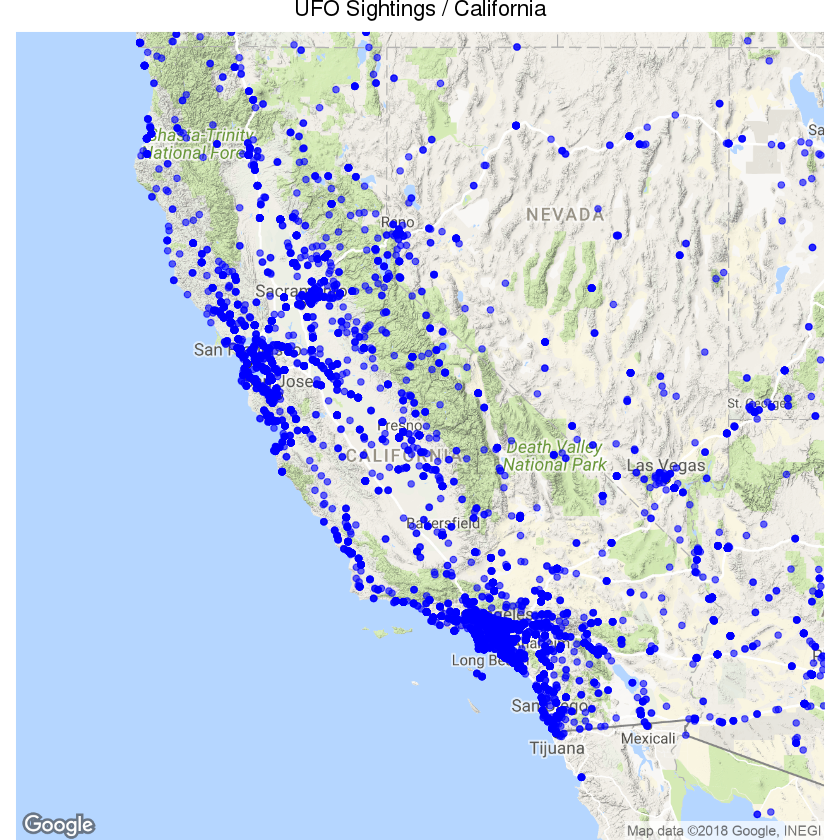

In [28]:
Cali <- suppressMessages(get_map("California", zoom = 6))

Cali_map <- ggmap(Cali, extent = "device", darken = c(.2,"white"))
Cali_map +
geom_point(aes(x = longitude, y = latitude), data = UFO3, alpha=0.6, color="blue") +
theme(legend.position="none") +
ggtitle("UFO Sightings / California") +
theme(plot.title = element_text(hjust = 0.5))

Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"Removed 69180 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 69180 rows containing non-finite values (stat_density2d)."

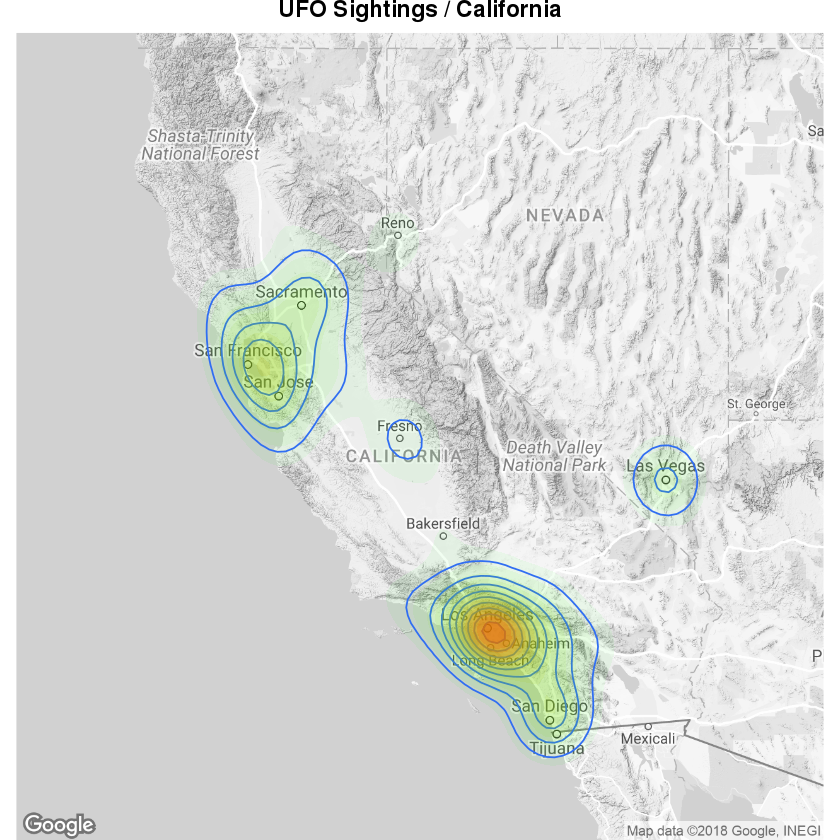

In [29]:
Cali <- suppressMessages(get_map("California", zoom = 6, color='bw'))

Cali_map <- ggmap(Cali, extent = "device", darken = c(.2,"white"))
Cali_map +
geom_density2d(data = UFO3, aes(x = longitude, y = latitude)) +
stat_density2d(data = UFO3, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0.05, 0.2), guide = FALSE) +
theme(legend.position="none") +
ggtitle("UFO Sightings / California") +
theme(plot.title=element_text(size=14, face="bold")) +
theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

In [30]:
ca_coord %>%
group_by(city) %>%
summarize(count=n()) %>%
arrange(-count) %>%
head(5)

city          count
1 los angeles   352  
2 san diego     336  
3 sacramento    201  
4 san francisco 186  
5 san jose      186

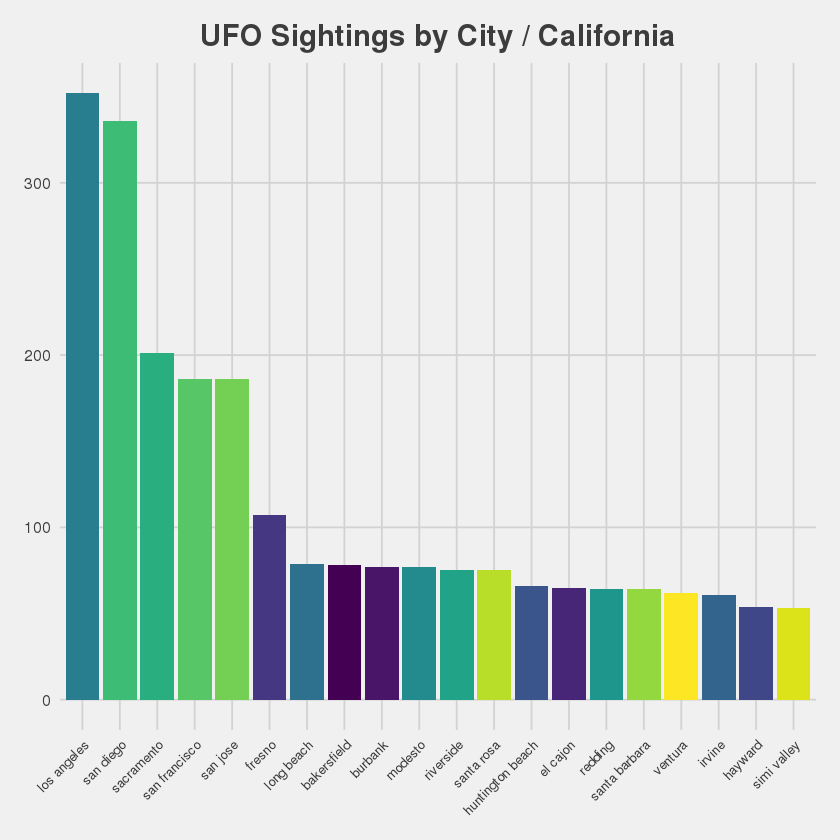

In [31]:
most_city_ca <- ca_coord %>%
    group_by(city) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

ggplot(head(most_city_ca, 20), aes(reorder(city, -count), count, fill=city)) +
geom_bar(stat = "identity") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle('UFO Sightings by City / California') +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))

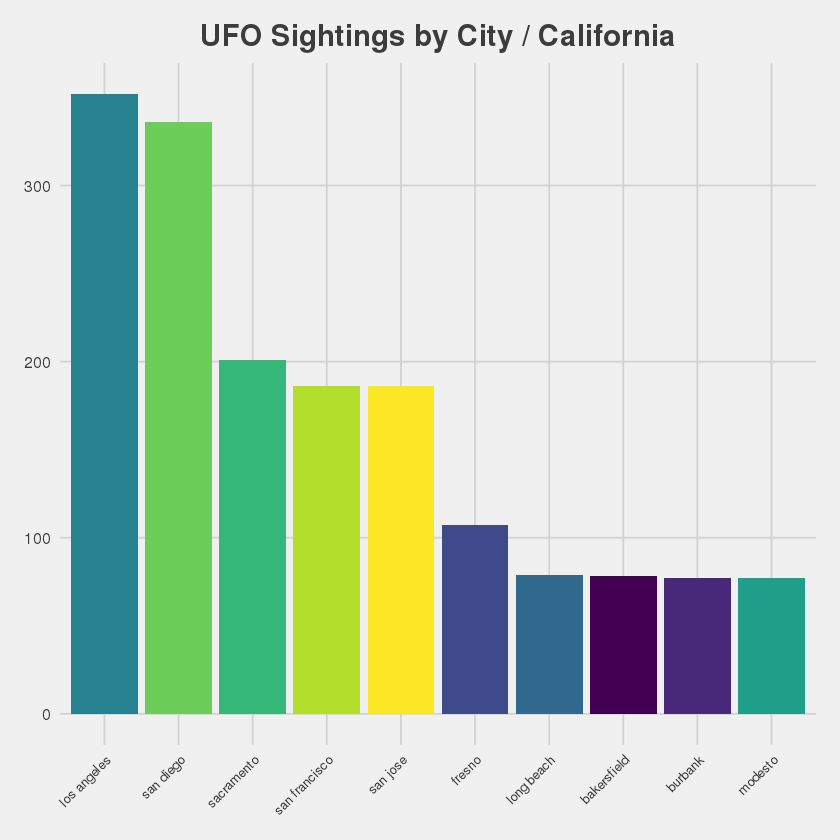

In [45]:
ggplot(head(most_city_ca, 10), aes(reorder(city, -count), count, fill=city)) +
geom_bar(stat = "identity") +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle('UFO Sightings by City / California') +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=los+angeles&zoom=8&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=los%20angeles&sensor=false
Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"Removed 4279 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 4279 rows containing non-finite values (stat_density2d)."

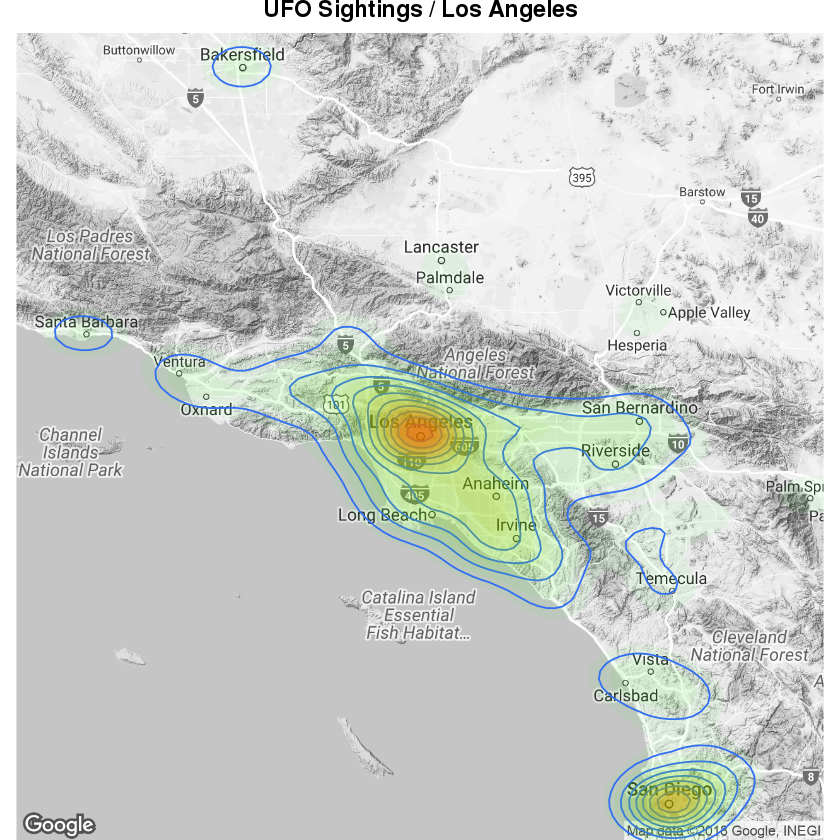

In [32]:
LAMap <- ggmap(get_map("los angeles", zoom = 8, color = "bw"),extent = "device", legend = "topleft")

LAMap +
geom_density2d(data = ca_coord, aes(x = longitude, y = latitude)) +
stat_density2d(data = ca_coord, aes(x = longitude, y = latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0.05, 0.2), guide = FALSE) +
theme(legend.position="none") +
ggtitle("UFO Sightings / Los Angeles") +
theme(plot.title=element_text(size=14, face="bold")) +
theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

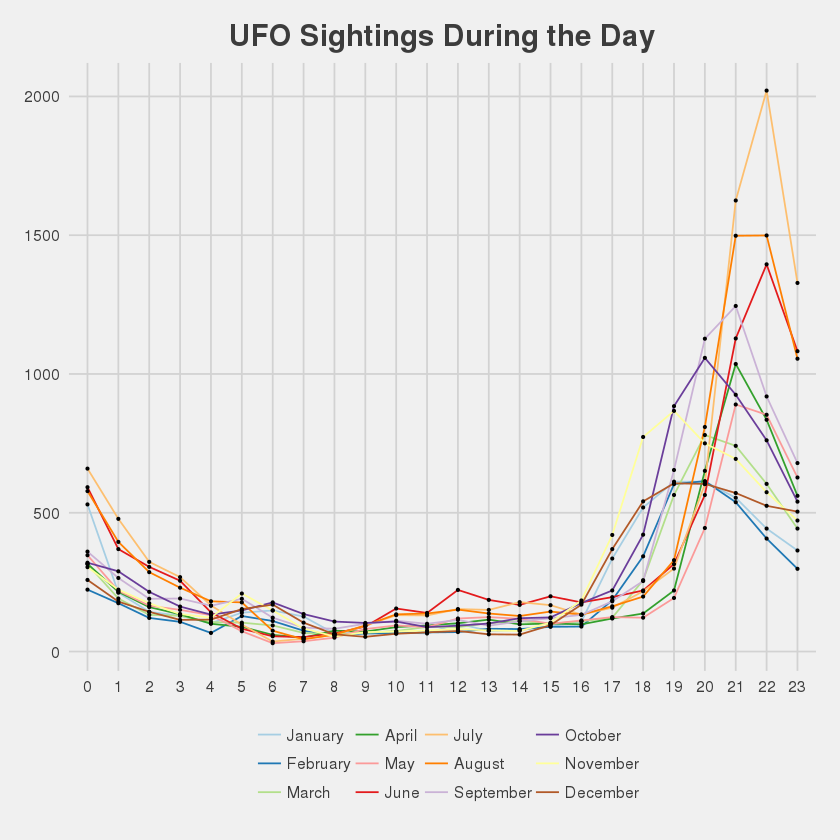

In [33]:
UFO3 %>% 
group_by(hour,month_name_ordered) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=factor(hour),y=count,color=month_name_ordered,group=month_name_ordered)) + 
geom_line() + 
scale_color_manual(name="",values=brewer.pal(12,'Paired')) + 
geom_point(color='black',size=.5,alpha=1) + 
theme_fivethirtyeight() +
ggtitle('UFO Sightings During the Day') +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Hour", y="Count")

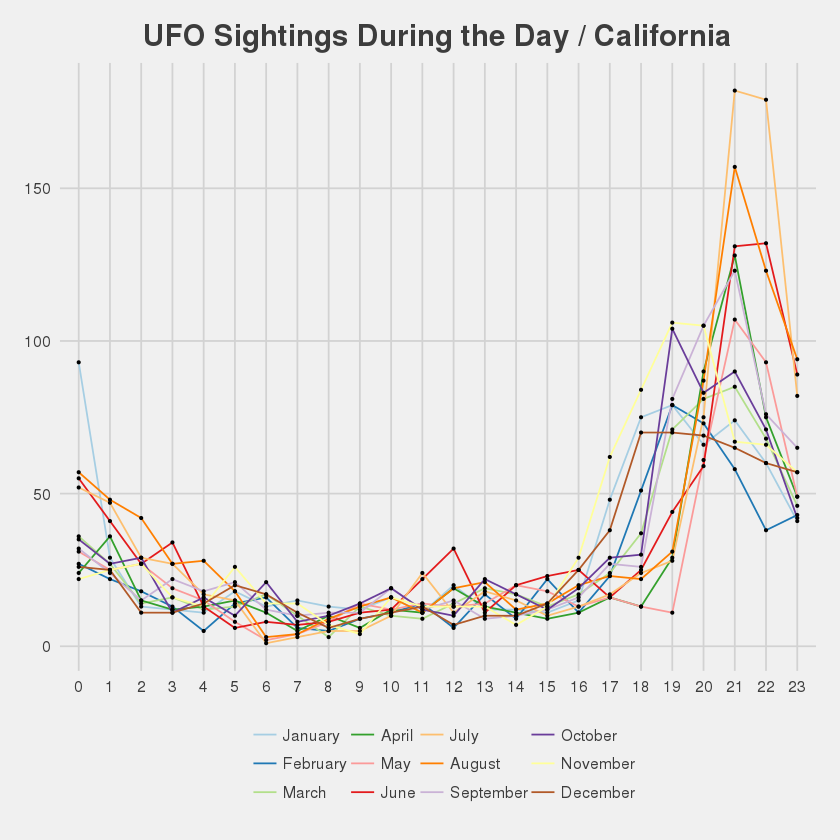

In [34]:
ca_coord %>% 
group_by(hour,month_name_ordered) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=factor(hour),y=count,color=month_name_ordered,group=month_name_ordered)) + 
geom_line() + 
scale_color_manual(name="",values=brewer.pal(12,'Paired')) + 
geom_point(color='black',size=.5,alpha=1) + 
theme_fivethirtyeight() +
ggtitle('UFO Sightings During the Day / California') +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Hour", y="Count")

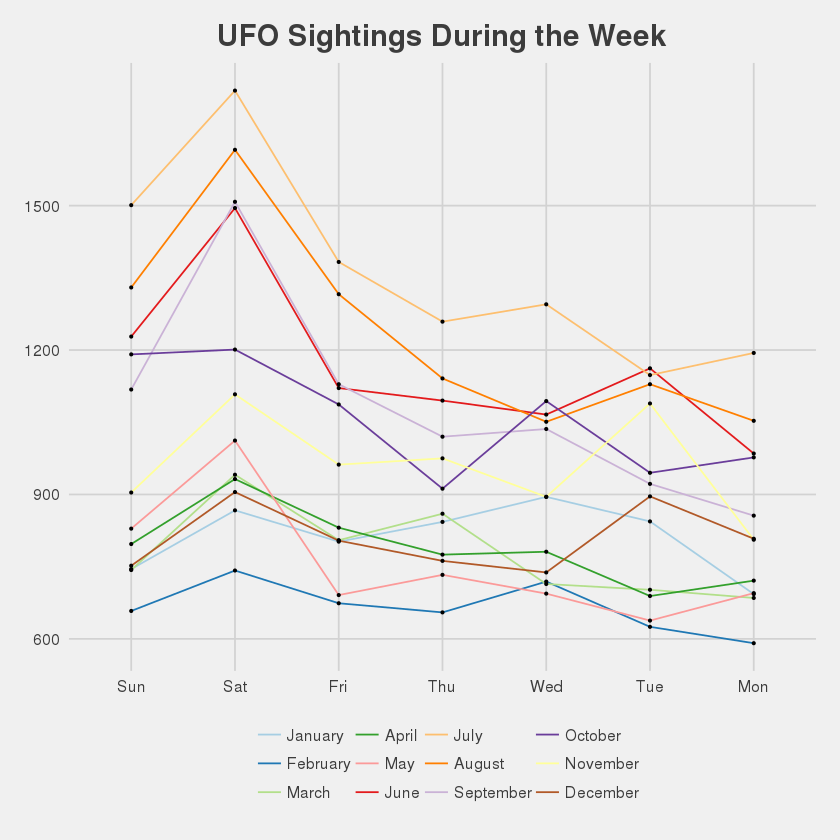

In [35]:
UFO3 %>% 
group_by(weekday,month_name_ordered) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=weekday,y=count,color=month_name_ordered,group=month_name_ordered)) + 
geom_line() + 
scale_color_brewer(name="",palette='Paired') + 
geom_point(color='black',size=.5,alpha=1) + 
ggtitle('UFO Sightings During the Week') +
theme_fivethirtyeight() +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Day", y="Count")

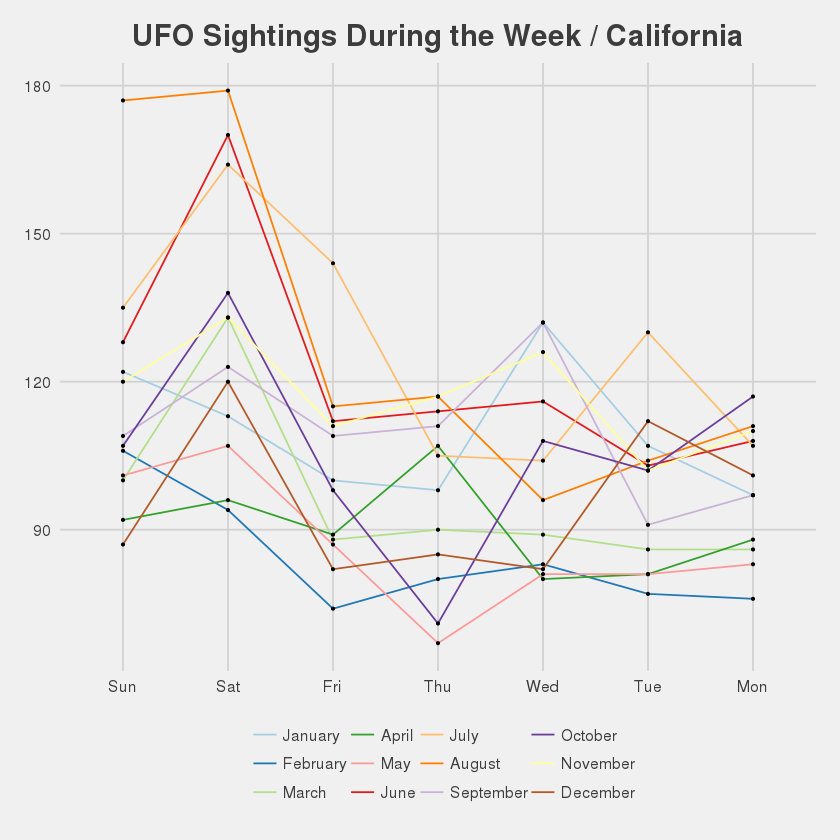

In [36]:
ca_coord %>% 
group_by(weekday,month_name_ordered) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=weekday,y=count,color=month_name_ordered,group=month_name_ordered)) + 
geom_line() + 
scale_color_brewer(name="",palette='Paired') + 
geom_point(color='black',size=.5,alpha=1) + 
ggtitle('UFO Sightings During the Week / California') +
theme_fivethirtyeight() +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Day", y="Count")

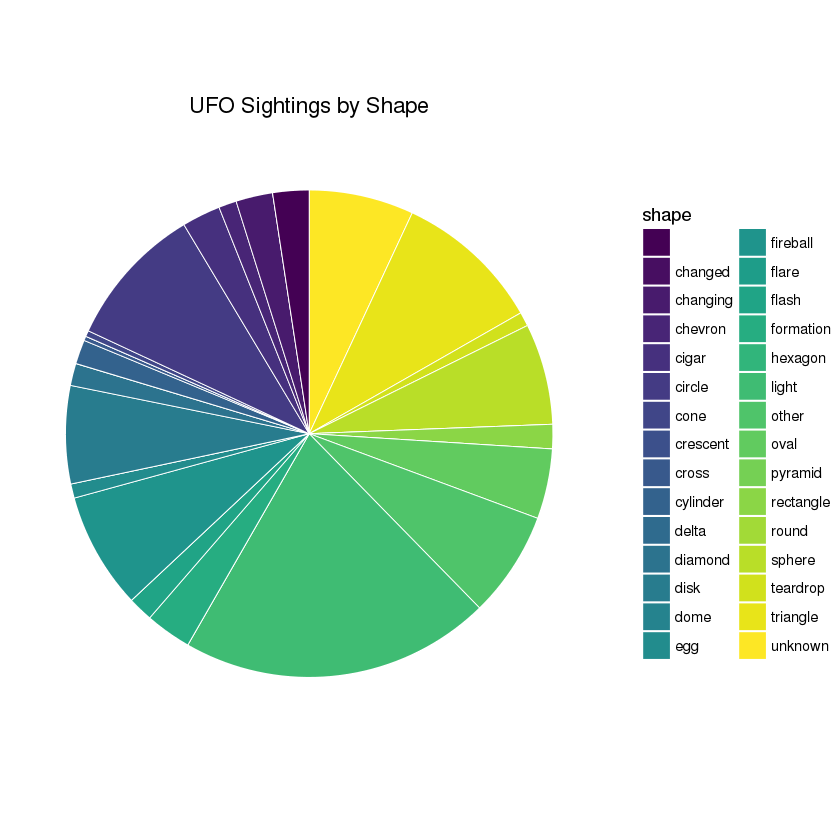

In [37]:
UFO3 %>% 
group_by(shape) %>% 
summarize(count=n()) %>% 
ggplot(aes(x="",y=count,fill=shape)) + 
geom_bar(width = 1, stat = "identity",color='white',size=.25) + coord_polar("y") +
scale_fill_viridis(discrete=TRUE) +
theme_void() +
ggtitle('UFO Sightings by Shape') +
theme(plot.title = element_text(hjust = 0.5))

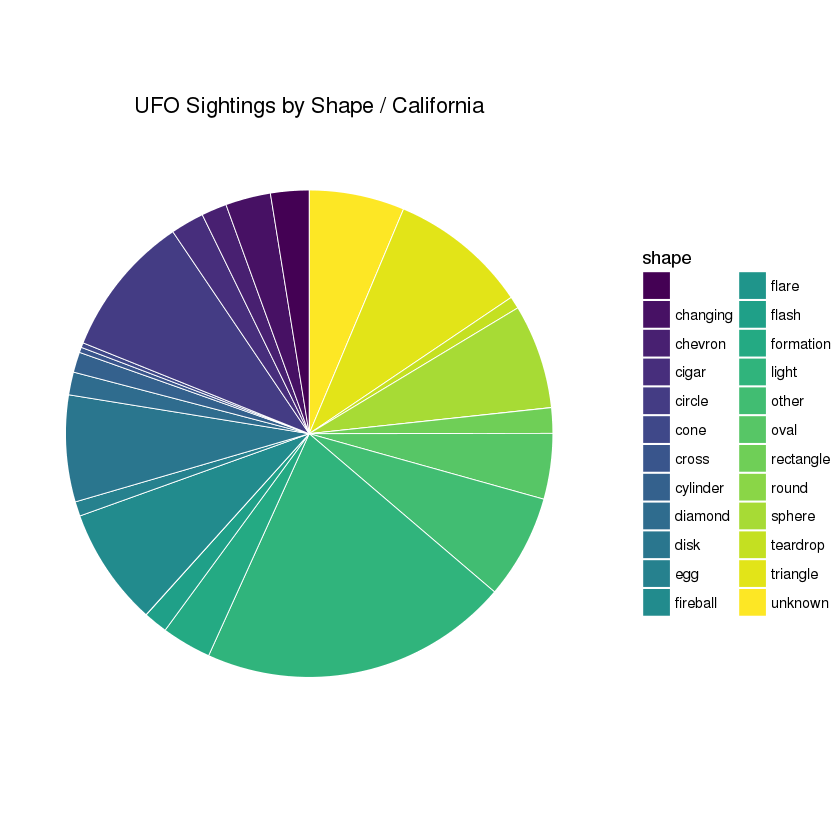

In [38]:
ca_coord %>% 
group_by(shape) %>% 
summarize(count=n()) %>% 
ggplot(aes(x="",y=count,fill=shape)) + 
geom_bar(width = 1, stat = "identity",color='white',size=.25) + coord_polar("y") +
scale_fill_viridis(discrete=TRUE) +
theme_void() +
ggtitle('UFO Sightings by Shape / California') +
theme(plot.title = element_text(hjust = 0.5))

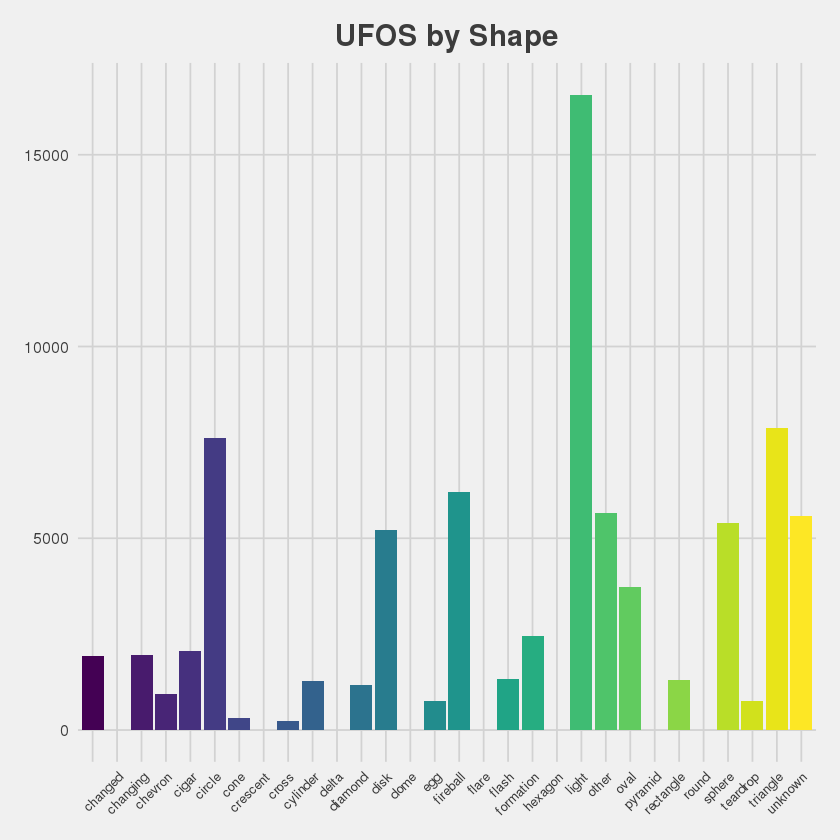

In [39]:
ggplot(UFO3,aes(shape,fill=shape)) +
stat_count() +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("UFOS by Shape") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))

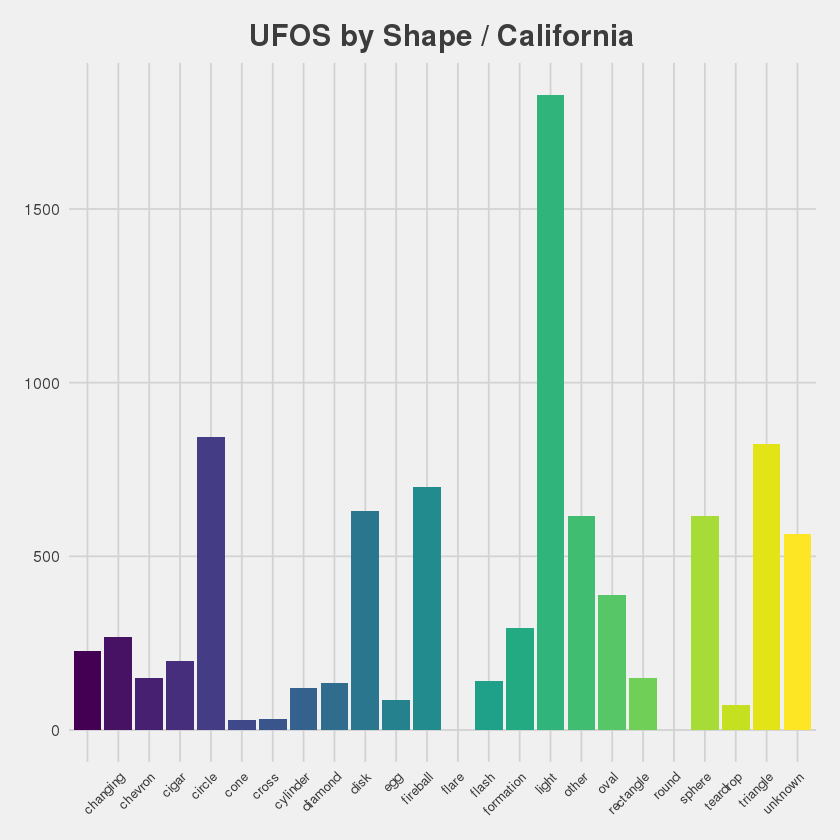

In [40]:
ggplot(ca_coord,aes(shape,fill=shape)) +
stat_count() +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("UFOS by Shape / California") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(legend.position="none") +
theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))

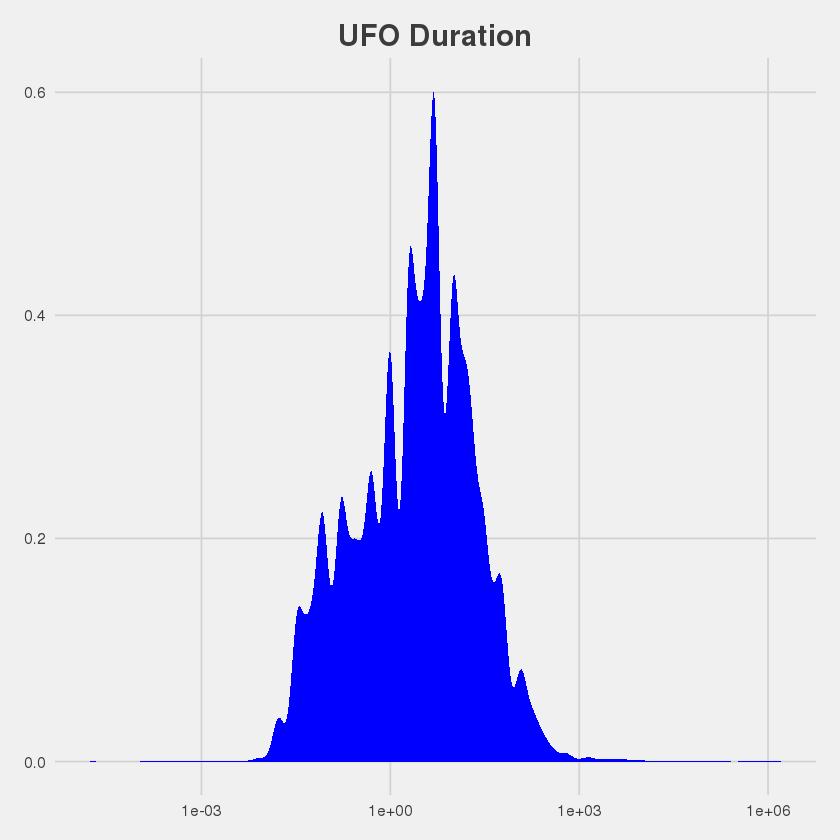

In [41]:
ggplot(UFO3,aes(length_min)) +
stat_density(fill="blue") +
scale_x_log10() +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("UFO Duration") +
theme(plot.title = element_text(hjust = 0.5)) +
labs(x="Duration", y="Density")

In [42]:
mean(UFO3$length_min)

[1] 150.2889

In [43]:
summary(UFO3$length_min)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      0.0       0.5       3.0     150.3      10.0 1630600.0 